In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


KEL 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
base_path = '/content/drive/My Drive/Projek KA/'

In [ ]:
df = pd.read_csv(base_path + 'billionaires_2024.csv')
df.head(10)

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,2024,4,1,233.0 B,Arnault,Bernard,Bernard Arnault & family,1949-03-05,75.0,Male,France,France,Paris,Fashion & Retail,['Fashion & Retail'],LVMH Moët Hennessy Louis Vuitton,Chairman and CEO,False,Increased
1,2024,4,2,195.0 B,Musk,Elon,Elon Musk,1971-06-28,52.0,Male,United States,United States,Austin,Automotive,['Automotive'],Tesla,CEO,True,Increased
2,2024,4,3,194.0 B,Bezos,Jeff,Jeff Bezos,1964-01-12,60.0,Male,United States,United States,Miami,Technology,['Technology'],Amazon,Chairman and Founder,True,Increased
3,2024,4,4,177.0 B,Zuckerberg,Mark,Mark Zuckerberg,1984-05-14,39.0,Male,United States,United States,Palo Alto,Technology,['Technology'],Meta Platforms,Cofounder,True,Increased
4,2024,4,5,141.0 B,Ellison,Larry,Larry Ellison,1944-08-17,79.0,Male,United States,United States,Woodside,Technology,['Technology'],Oracle,CTO and Founder,True,Increased
5,2024,4,6,133.0 B,Buffett,Warren,Warren Buffett,1930-08-30,93.0,Male,United States,United States,Omaha,Finance & Investments,['Finance & Investments'],Berkshire Hathaway Inc. (Cl A),CEO,True,Increased
6,2024,4,7,128.0 B,Gates,Bill,Bill Gates,1955-10-28,68.0,Male,United States,United States,Medina,Technology,['Technology'],Bill & Melinda Gates Foundation,Cochair,True,Increased
7,2024,4,8,121.0 B,Ballmer,Steve,Steve Ballmer,1956-03-24,68.0,Male,United States,United States,Hunts Point,Technology,['Technology'],Los Angeles Clippers,Owner,True,Increased
8,2024,4,9,116.0 B,Ambani,Mukesh,Mukesh Ambani,1957-04-19,66.0,Male,India,India,Mumbai,Diversified,['Diversified'],Reliance Industries,Chairman and managing director,False,Increased
9,2024,4,10,114.0 B,Page,Larry,Larry Page,1973-03-26,51.0,Male,United States,United States,Palo Alto,Technology,['Technology'],Alphabet,Cofounder and board member,True,Increased


CLEANING

In [ ]:
print("\nMissing values sebelum cleaning:")
print(df.isnull().sum())

# Isi missing values dengan 'Unknown'
cat_cols = ['gender', 'country_of_citizenship', 'country_of_residence', 'city_of_residence',
            'business_category', 'business_industries', 'organization_name',
            'position_in_organization', 'wealth_status']
df[cat_cols] = df[cat_cols].fillna('Unknown')


Missing values sebelum cleaning:
year                           0
month                          0
rank                           0
net_worth                      0
last_name                      0
first_name                     4
full_name                      0
birth_date                    82
age                           72
gender                         0
country_of_citizenship         0
country_of_residence          34
city_of_residence             63
business_category              0
business_industries            0
organization_name           2449
position_in_organization    2426
self_made                      0
wealth_status                271
dtype: int64


In [ ]:
# Age buat median
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
# Bersihkan kolom net_worth (contoh: "233.0 B" jadi 233.0)
def clean_net_worth(x):
    if pd.isna(x):
        return np.nan
    return float(re.sub(r'[^\d.]', '', str(x)))

df['net_worth'] = df['net_worth'].apply(clean_net_worth)

In [ ]:
# Hapus kolom yang tidak diperlukan / terlalu unik
cols_to_drop = ['year', 'month', 'full_name', 'first_name', 'last_name',
                'birth_date', 'organization_name', 'position_in_organization']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

In [ ]:
# Pastikan tipe data self_made adalah boolean
print("\nInfo setelah cleaning:")
print(df.info())


Info setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    2781 non-null   int64  
 1   net_worth               2781 non-null   float64
 2   age                     2781 non-null   float64
 3   gender                  2781 non-null   object 
 4   country_of_citizenship  2781 non-null   object 
 5   country_of_residence    2781 non-null   object 
 6   city_of_residence       2781 non-null   object 
 7   business_category       2781 non-null   object 
 8   business_industries     2781 non-null   object 
 9   self_made               2781 non-null   bool   
 10  wealth_status           2781 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 220.1+ KB
None


In [ ]:
clean_file_path = base_path + 'data_cleaning.csv'
df.to_csv(clean_file_path, index=False)
print(f"\nData yang sudah dibersihkan berhasil disimpan di:")
print(clean_file_path)


Data yang sudah dibersihkan berhasil disimpan di:
/content/drive/My Drive/Projek KA/data_cleaning.csv


In [ ]:
df_viz = pd.read_csv('/content/drive/My Drive/Projek KA/data_cleaning.csv')

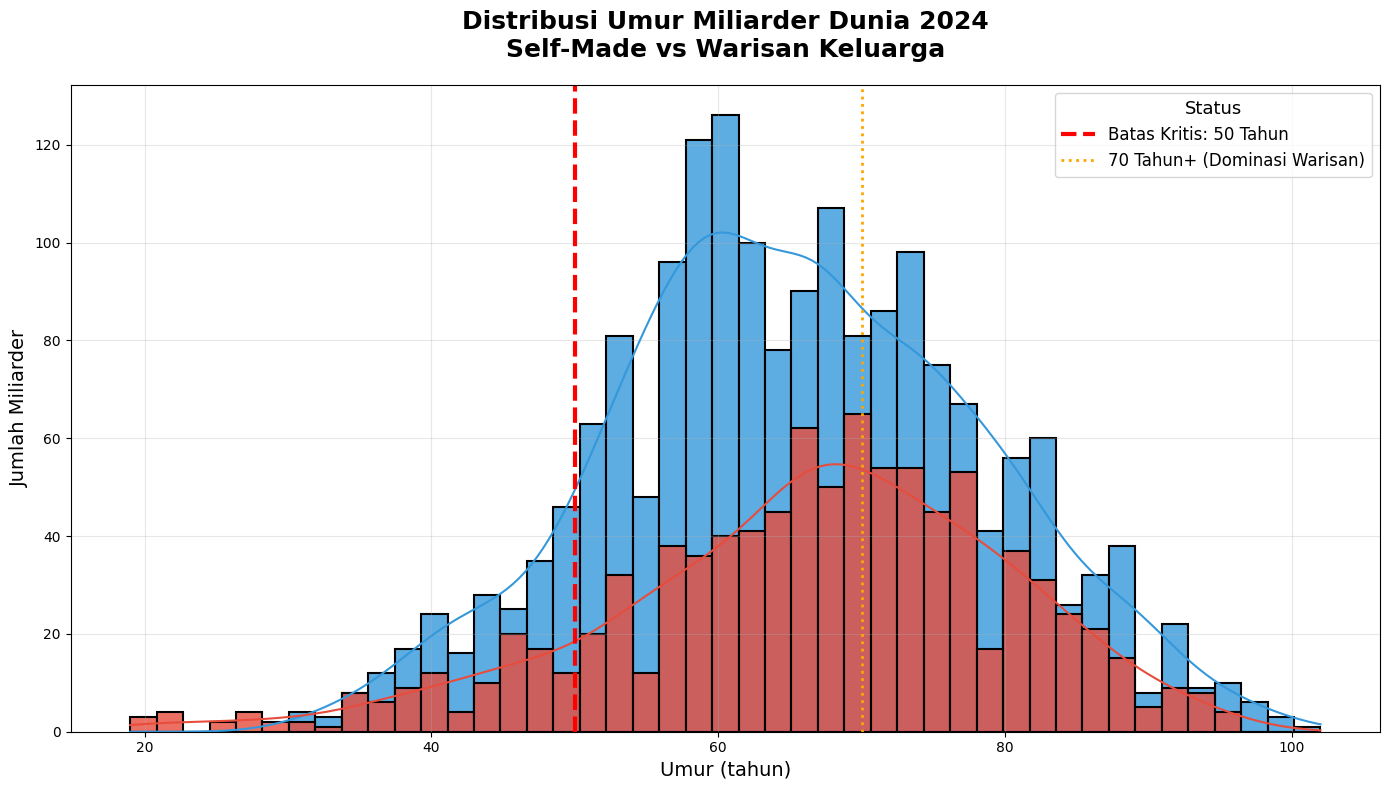

In [ ]:

df_viz['Status'] = df_viz['self_made'].map({True: 'Self-Made', False: 'Warisan Keluarga'})

# 1. Distribusi Umur
plt.figure(figsize=(14,8))
sns.histplot(data=df_viz, x='age', hue='Status', bins=45, kde=True,
             palette=['#e74c3c', '#3498db'], alpha=0.8, linewidth=1.5)
plt.axvline(50, color='red', linestyle='--', linewidth=3, label='Batas Kritis: 50 Tahun')
plt.axvline(70, color='orange', linestyle=':', linewidth=2, label='70 Tahun+ (Dominasi Warisan)')
plt.title('Distribusi Umur Miliarder Dunia 2024\nSelf-Made vs Warisan Keluarga',
          fontsize=18, pad=20, weight='bold')
plt.xlabel('Umur (tahun)', fontsize=14)
plt.ylabel('Jumlah Miliarder', fontsize=14)
plt.legend(title='Status', fontsize=12, title_fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

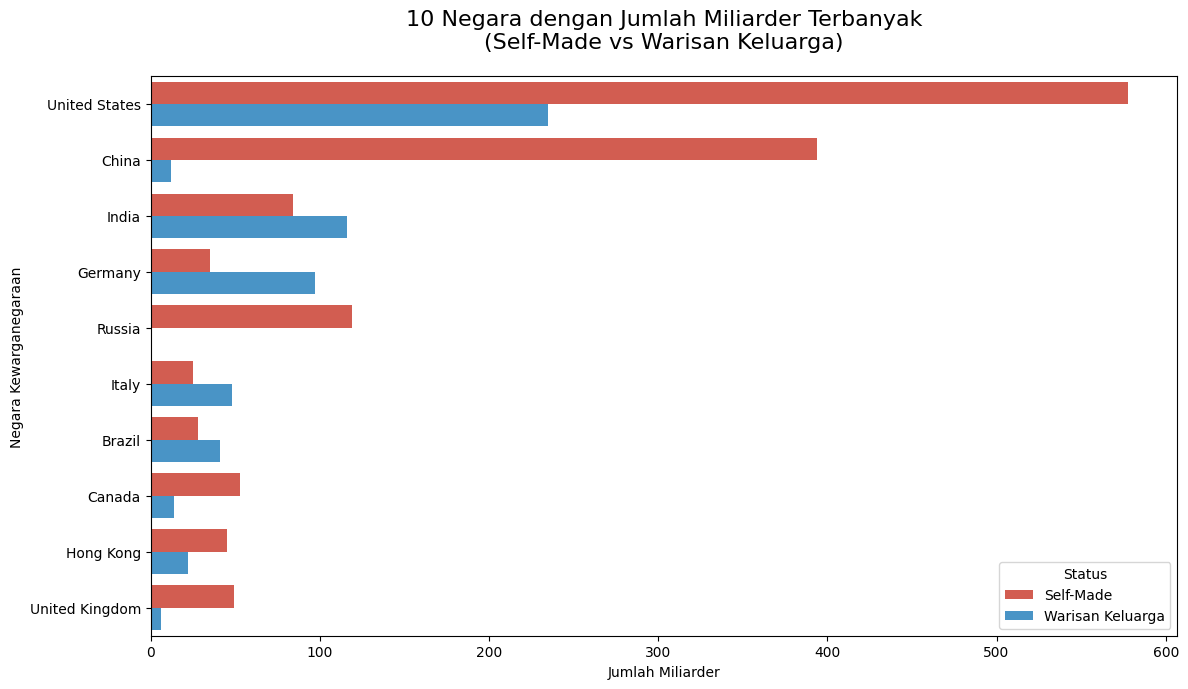

In [ ]:
# 10 Negara dengan Miliarder Terbanyak
top10 = df_viz['country_of_citizenship'].value_counts().head(10).index
plt.figure(figsize=(12,7))
sns.countplot(data=df_viz[df_viz['country_of_citizenship'].isin(top10)],
              y='country_of_citizenship', hue='Status',
              order=top10, palette=['#e74c3c', '#3498db'])
plt.title('10 Negara dengan Jumlah Miliarder Terbanyak\n(Self-Made vs Warisan Keluarga)',
          fontsize=16, pad=20)
plt.xlabel('Jumlah Miliarder')
plt.ylabel('Negara Kewarganegaraan')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

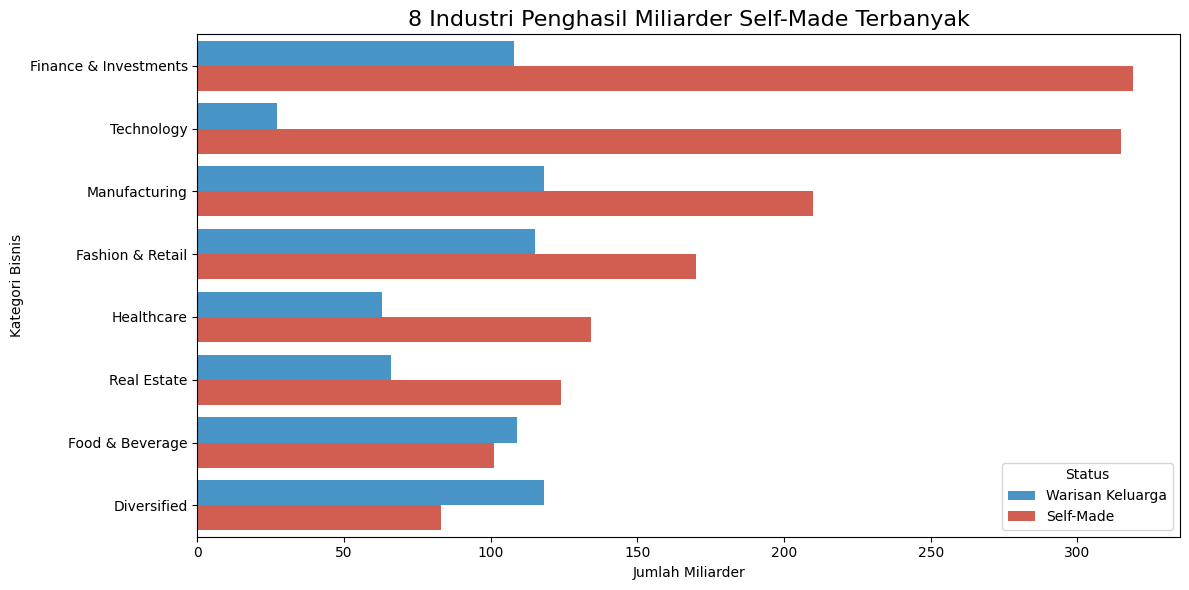

In [ ]:
# Industri yang Paling Banyak Menghasilkan Self-Made
plt.figure(figsize=(12,6))
order_ind = df_viz[df_viz['self_made']==True]['business_category'].value_counts().head(8).index
sns.countplot(data=df_viz[df_viz['business_category'].isin(order_ind)],
              y='business_category', hue='Status', order=order_ind,
              palette=['#3498db', '#e74c3c'])
plt.title('8 Industri Penghasil Miliarder Self-Made Terbanyak', fontsize=16)
plt.xlabel('Jumlah Miliarder')
plt.ylabel('Kategori Bisnis')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Preprosesing

In [ ]:
# Target: self_made jadi 1 (self-made) dan 0 (warisan)
df['self_made'] = df['self_made'].astype(int)

In [ ]:
# Label Encoding untuk kolom kategorikal
le_dict = {}  # simpan encoder biar bisa dipakai lagi nanti
categorical_cols = ['gender', 'country_of_citizenship', 'country_of_residence',
                    'city_of_residence', 'business_category',
                    'business_industries', 'wealth_status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le
    print(f"{col:25} → {df[col].nunique()} unique values")

gender                    → 2 unique values
country_of_citizenship    → 78 unique values
country_of_residence      → 77 unique values
city_of_residence         → 778 unique values
business_category         → 18 unique values
business_industries       → 18 unique values
wealth_status             → 5 unique values


In [ ]:
# Scaling fitur numerik

numerical_cols = ['rank', 'net_worth', 'age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nPreprocessing selesai!")
df.head()


Preprocessing selesai!


,rank,net_worth,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,self_made,wealth_status
0,-1.742063,18.637001,0.700593,1,23,23,525,4,4,0,1
1,-1.740781,15.529341,-1.031339,1,73,72,28,0,0,1,1
2,-1.739499,15.447561,-0.428928,1,73,72,433,16,16,1,1
3,-1.738217,14.057292,-2.010257,1,73,72,518,16,16,1,1
4,-1.736935,11.113193,1.001798,1,73,72,740,16,16,1,1


In [ ]:
preprocessed_path = '/content/drive/My Drive/Projek KA/data_cleaning_preprocessed.csv'
df.to_csv(preprocessed_path, index=False)

RANDOM FOREST

In [ ]:
df = pd.read_csv(preprocessed_path)

In [ ]:
# PISAH FITUR & TARGET + TRAIN-TEST SPLIT

X = df.drop('self_made', axis=1)
y = df['self_made']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")

Train: (2224, 10) | Test: (557, 10)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Training selesai!")

Training selesai!


In [ ]:
# EVALUASI

In [ ]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"AKURASI: {acc:.4f} ({acc*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Warisan', 'Self-Made']))

AKURASI: 0.8025 (80.25%)

Classification Report:
              precision    recall  f1-score   support

     Warisan       0.73      0.66      0.69       187
   Self-Made       0.84      0.87      0.85       370

    accuracy                           0.80       557
   macro avg       0.78      0.77      0.77       557
weighted avg       0.80      0.80      0.80       557



VISUALISASI

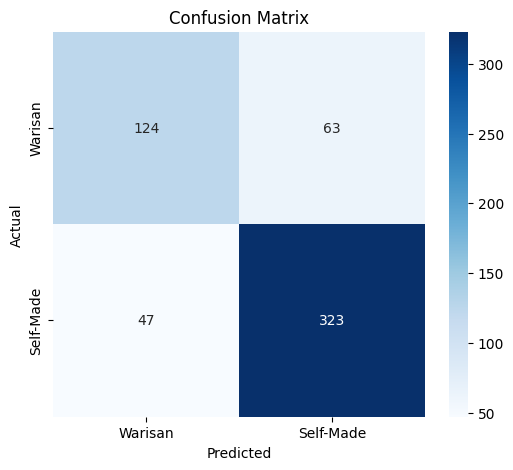

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Warisan', 'Self-Made'],
            yticklabels=['Warisan', 'Self-Made'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

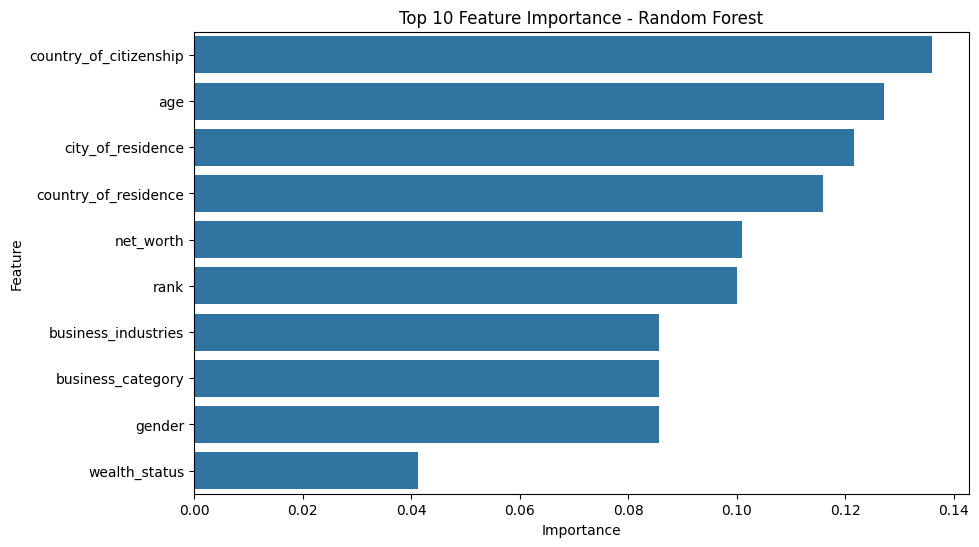


Top 10 Fitur Paling Penting:
                  Feature  Importance
4  country_of_citizenship    0.136018
2                     age    0.127171
6       city_of_residence    0.121537
5    country_of_residence    0.116000
1               net_worth    0.100911
0                    rank    0.099988
8     business_industries    0.085729
7       business_category    0.085724
3                  gender    0.085704
9           wealth_status    0.041219


In [ ]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
plt.title('Top 10 Feature Importance - Random Forest')
plt.show()

print("\nTop 10 Fitur Paling Penting:")
print(feat_imp.head(10))